# Neural Network

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from classifiers.neural_net import TwoLayerNet
from util.gradient_check import eval_numerical_gradient
from util.data_utils import load_CIFAR10
from util.vis_utils import visualize_grid

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# toy data to verify the implementation

input_size = 4
hidden_size = 10
num_classes = 3
num_examples = 5

def toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_examples, input_size)
    y = np.array([0, 1, 2, 2, 1])
    # y = np.random.randint(num_classes, size=num_examples)
    return X, y

In [4]:
net = toy_model()
X, y = toy_data()
# print(net.params)

## Foward pass: Scores & Loss
Using weights and biases compute scores for all inputs and loss.

In [5]:
def error(a, b):
    print(np.sum(np.abs(a - b)))

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

scores = net.loss(X)
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])

loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

error(loss, correct_loss)
error(scores, correct_scores)

1.79856129989e-13
3.68027207459e-08


## Backward pass: Gradients
Use backprop to compute gradients on weights and biases of each layer. Perform gradient check using numerical gradient. 

In [259]:
loss, grads = net.loss(X, y, reg=0.1)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 4.447646e-11
W2 max relative error: 3.440708e-09


## Train the network
Stochastic Gadient Descent (SGD), to minimize the loss function

Final training loss:  0.0171496079387


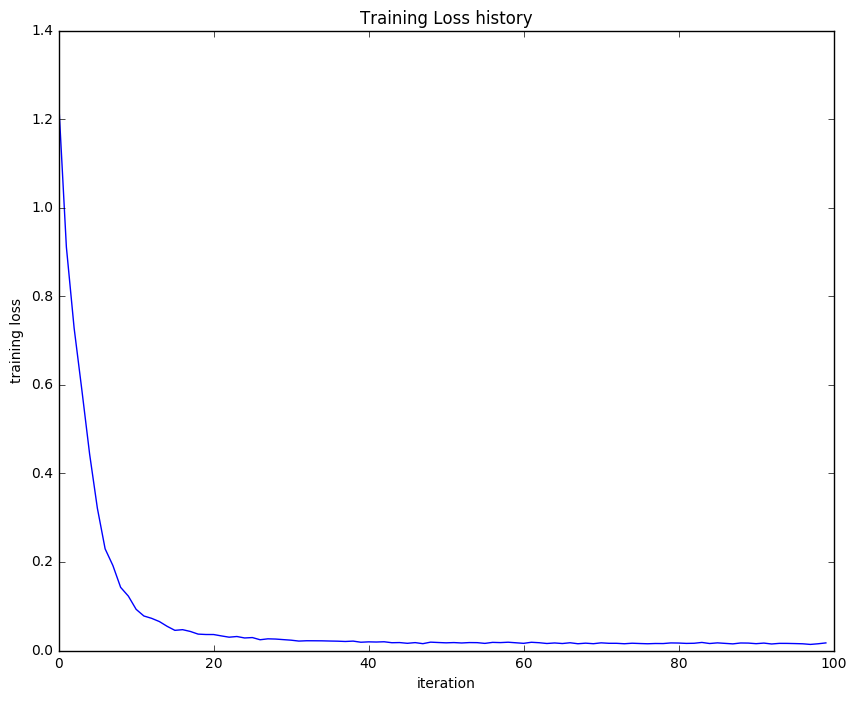

In [291]:
net = toy_model()
stats = net.train(X, y, X, y, learning_rate=1e-1, reg=1e-5, num_iters=100)

print('Final training loss: ', stats[0][-1])

# plot the loss history
plt.plot(stats[0])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [278]:
net.predict(X)

array([0, 1, 2, 2, 1])

## Load the data
Load CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [6]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'util/datasets/cifar-10-batches-py'
    Xtrain, ytrain, Xtest, ytest = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = range(num_training, num_training + num_validation)
    Xval = Xtrain[mask]
    yval = ytrain[mask]
    mask = range(num_training)
    Xtrain = Xtrain[mask]
    ytrain = ytrain[mask]
    mask = range(num_test)
    Xtest = Xtest[mask]
    ytest = ytest[mask]
    
    # Preprocessing: reshape the image data into rows
    Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], -1))
    Xval = np.reshape(Xval, (Xval.shape[0], -1))
    Xtest = np.reshape(Xtest, (Xtest.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(Xtrain, axis=0)
    Xtrain -= mean_image
    Xval -= mean_image
    Xtest -= mean_image
    
    return Xtrain, ytrain, Xval, yval, Xtest, ytest

Xtrain, ytrain, Xval, yval, Xtest, ytest = get_CIFAR10_data()

## Train the network

iteration 0 / 2000: loss 2.303326
iteration 100 / 2000: loss 1.954966
iteration 200 / 2000: loss 1.780316
iteration 300 / 2000: loss 1.708834
iteration 400 / 2000: loss 1.705832
iteration 500 / 2000: loss 1.527465
iteration 600 / 2000: loss 1.554162
iteration 700 / 2000: loss 1.509203
iteration 800 / 2000: loss 1.532461
iteration 900 / 2000: loss 1.416944
iteration 1000 / 2000: loss 1.449681
iteration 1100 / 2000: loss 1.536874
iteration 1200 / 2000: loss 1.426147
iteration 1300 / 2000: loss 1.517587
iteration 1400 / 2000: loss 1.360993
iteration 1500 / 2000: loss 1.362608
iteration 1600 / 2000: loss 1.336803
iteration 1700 / 2000: loss 1.441524
iteration 1800 / 2000: loss 1.381873
iteration 1900 / 2000: loss 1.452509
Validation accuracy:  0.503


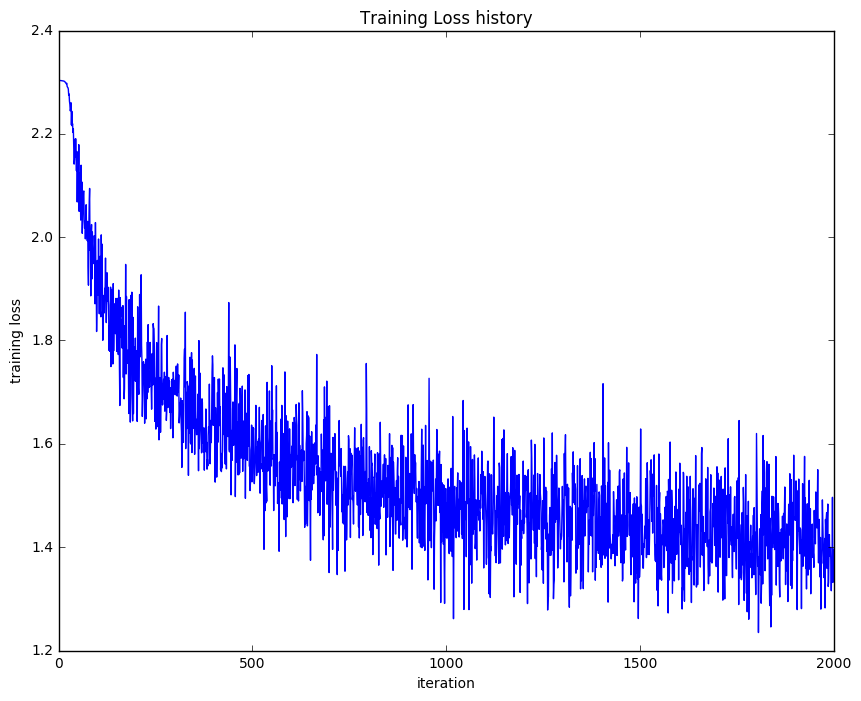

In [14]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(Xtrain, ytrain, Xval, yval,
            num_iters=2000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(Xval) == yval).mean()
print('Validation accuracy: ', val_acc)

# plot the loss history
plt.plot(stats[0])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

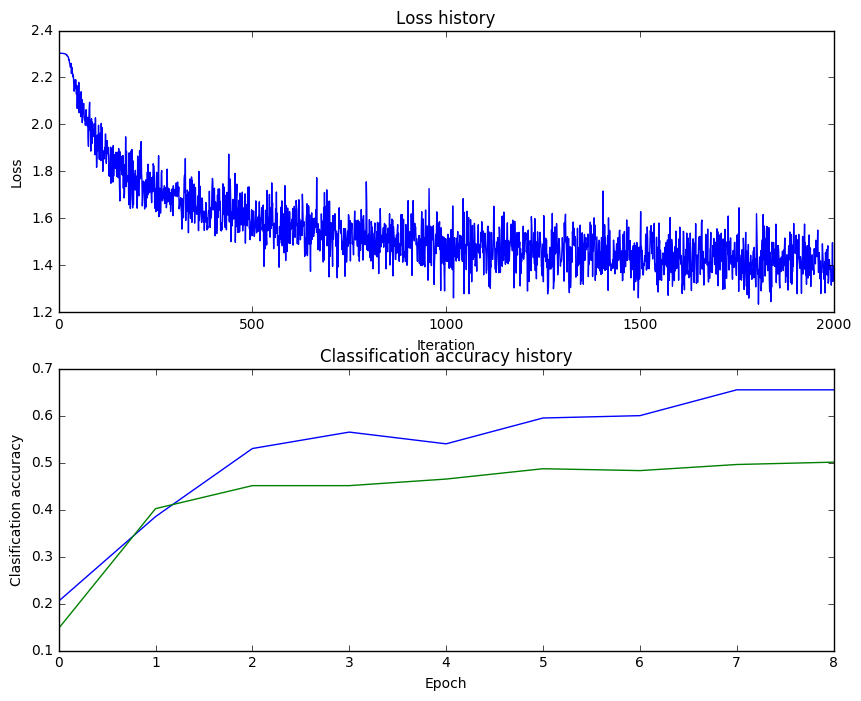

In [15]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats[0])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats[1], label='train')
plt.plot(stats[2], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

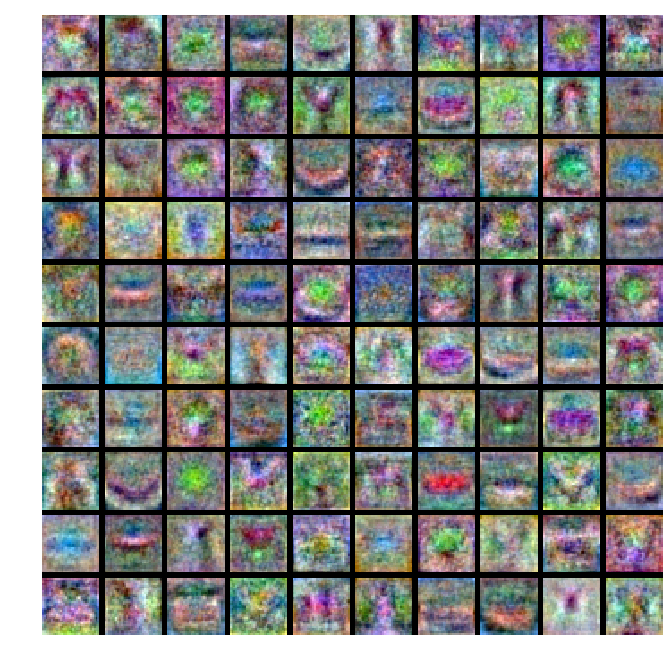

In [16]:
# Visualize the weights of the network
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

## Tune the hyperparameters

In [18]:
hidden_sizes = [50, 100, 150]
learning_rates = [5e-3, 1e-3, 5e-2]

best_acc = 0.0
best_net = None
for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        input_size = 32 * 32 * 3
        num_classes = 10
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        
        print(hidden_size, learning_rate)
        # Train the network
        stats = net.train(Xtrain, ytrain, Xval, yval,
                    num_iters=1000, batch_size=200,
                    learning_rate=learning_rate, learning_rate_decay=0.95,
                    reg=0.5, verbose=True)

        # Predict on the validation set
        val_acc = (net.predict(Xval) == yval).mean()
        print('Validation accuracy: ', val_acc)
        if val_acc > best_acc:
            best_net = net

50 0.005
iteration 0 / 1000: loss 2.302975


/home/shubham/Documents/CS231n/Assignment/assignment1S/classifiers/neural_net.py:47: RuntimeWarning: divide by zero encountered in log
  negative_log_prob = - np.log(prob[range(num_examples), y])
/home/shubham/Documents/CS231n/Assignment/assignment1S/classifiers/neural_net.py:45: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
/home/shubham/Documents/CS231n/Assignment/assignment1S/classifiers/neural_net.py:46: RuntimeWarning: invalid value encountered in true_divide
  prob = exp_scores / np.sum(exp_scores, axis=1).reshape(-1, 1)
/home/shubham/Documents/CS231n/Assignment/assignment1S/classifiers/neural_net.py:36: RuntimeWarning: invalid value encountered in less
  hidden[hidden < 0] = 0
/home/shubham/Documents/CS231n/Assignment/assignment1S/classifiers/neural_net.py:66: RuntimeWarning: invalid value encountered in less_equal
  dhidden[hidden <= 0] = 0


iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan


/home/shubham/Documents/CS231n/Assignment/assignment1S/classifiers/neural_net.py:120: RuntimeWarning: invalid value encountered in less
  h1[h1 < 0] = 0


iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  0.087
50 0.001
iteration 0 / 1000: loss 2.302989
iteration 100 / 1000: loss 1.877239
iteration 200 / 1000: loss 1.835668
iteration 300 / 1000: loss 1.601094
iteration 400 / 1000: loss 1.626328
iteration 500 / 1000: loss 1.614207
iteration 600 / 1000: loss 1.653767
iteration 700 / 1000: loss 1.578290
iteration 800 / 1000: loss 1.386393
iteration 900 / 1000: loss 1.596950
Validation accuracy:  0.465
50 0.05
iteration 0 / 1000: loss 2.302977
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  0.087
100 0.005
i

In [21]:
# Train the network
hidden_size = 150
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(Xtrain, ytrain, Xval, yval,
            num_iters=4000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

iteration 0 / 4000: loss 2.303710
iteration 100 / 4000: loss 1.945336
iteration 200 / 4000: loss 1.837237
iteration 300 / 4000: loss 1.725997
iteration 400 / 4000: loss 1.563403
iteration 500 / 4000: loss 1.562761
iteration 600 / 4000: loss 1.575172
iteration 700 / 4000: loss 1.463133
iteration 800 / 4000: loss 1.503855
iteration 900 / 4000: loss 1.633859
iteration 1000 / 4000: loss 1.511962
iteration 1100 / 4000: loss 1.414773
iteration 1200 / 4000: loss 1.352125
iteration 1300 / 4000: loss 1.412299
iteration 1400 / 4000: loss 1.502739
iteration 1500 / 4000: loss 1.443266
iteration 1600 / 4000: loss 1.342261
iteration 1700 / 4000: loss 1.412542
iteration 1800 / 4000: loss 1.428602
iteration 1900 / 4000: loss 1.392097
iteration 2000 / 4000: loss 1.290613
iteration 2100 / 4000: loss 1.444459
iteration 2200 / 4000: loss 1.395533
iteration 2300 / 4000: loss 1.289319
iteration 2400 / 4000: loss 1.445961
iteration 2500 / 4000: loss 1.343622
iteration 2600 / 4000: loss 1.453663
iteration 270

Validation accuracy:  0.542


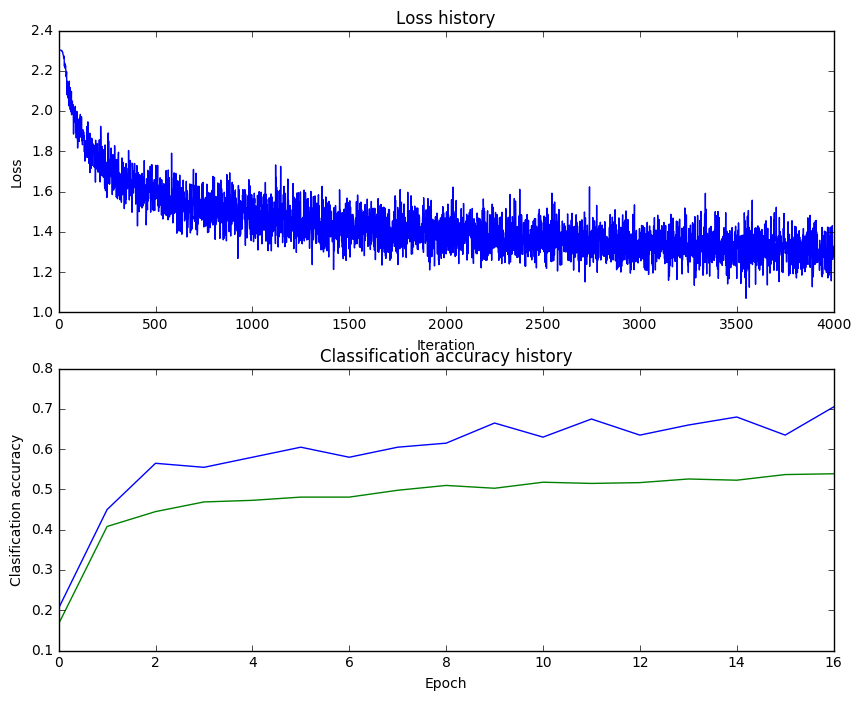

In [29]:
# Predict on the validation set
val_acc = (net.predict(Xval) == yval).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats[0])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats[1], label='train')
plt.plot(stats[2], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Run on the test set

In [26]:
test_acc = (net.predict(Xtest) == ytest).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.546
